# With `scipy` we can perform more complicate fits

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

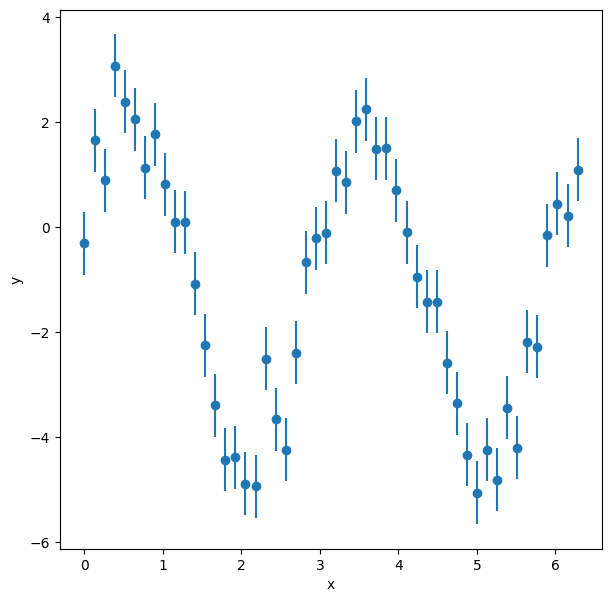

In [22]:
# define x and y
npoints = 50
x = np.linspace(0, 2 * np.pi, npoints)

# make y a complicated function with 4 parameters
a = 3.4
b = 2.1
c = 0.27
d = -1.3

# add randomness
sigma = 0.6
np.random.seed(120)

# create y
y = a * np.sin(x * b + c) + d + np.random.normal(scale=sigma, size=npoints)
y_err = np.full(npoints, sigma)

# plot
f = plt.figure(figsize=(7, 7))
plt.errorbar(x, y, y_err, fmt='o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [23]:
# define the function we're trying to recover
def f_line(x, a, b, c, d):
    return a * np.sin(x * b + c) + d

In [32]:
# perform the fit
params, params_cov = optimize.curve_fit(f_line, x, y, sigma=y_err, p0=[1, 2, 0.1, -1])

3.3013506359190132 2.087975079076848 0.34259747530767143 -1.1947310594081135


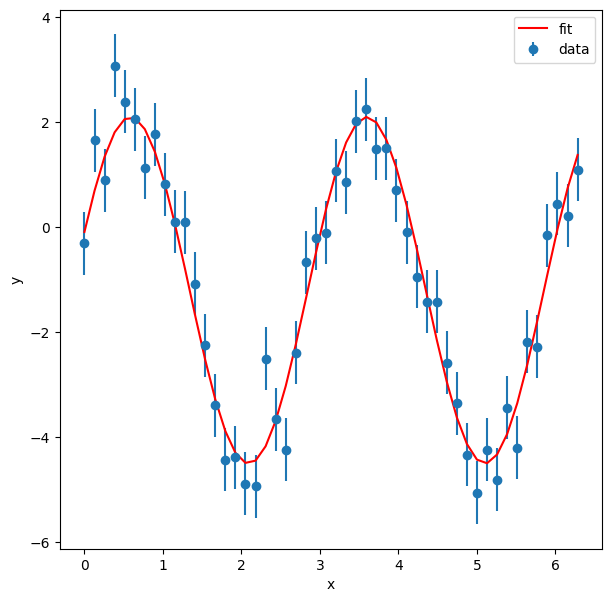

In [40]:
a_fit, b_fit, c_fit, d_fit = params

print(a_fit, b_fit, c_fit, d_fit)

y_fit = f_line(x, a_fit, b_fit, c_fit, d_fit)

f = plt.figure(figsize=(7, 7))
plt.errorbar(x, y, y_err, fmt='o', label='data')
plt.plot(x, y_fit, 'r-', label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [44]:
# calculate the error on the best-fit values
# extract the diagonal and take the square root
params_err = np.sqrt(np.diag(params_cov))

_ = [print(f'a = {param:.5f} +- {param_err:.5f}') for param, param_err in list(zip(params, params_err))]

a = 3.30135 +- 0.12015
a = 2.08798 +- 0.01922
a = 0.34260 +- 0.07221
a = -1.19473 +- 0.08552
